<a href="https://colab.research.google.com/github/koyyadasaiteja/generative-ai/blob/main/Generative_Ai_Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#libraries

In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist, cifar10, fashion_mnist
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

2.Define the Neural Network Architecture

In [5]:
def build_model(input_shape, num_classes):
    model = Sequential([
        Flatten(input_shape=input_shape),        # Flatten the input
        Dense(128, activation='relu'),           # First hidden layer
        Dropout(0.5),                            # Dropout for regularization
        Dense(64, activation='relu'),            # Second hidden layer
        Dense(num_classes, activation='softmax') # Output layer
    ])
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model


3. Dataset Preparation and Model Training

In [6]:
# Load and prepare the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize pixel values
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Build and train the model
model = build_model((28, 28), 10)
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)
model.evaluate(x_test, y_test)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7884 - loss: 0.6892 - val_accuracy: 0.9478 - val_loss: 0.1761
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9275 - loss: 0.2454 - val_accuracy: 0.9631 - val_loss: 0.1307
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9389 - loss: 0.2024 - val_accuracy: 0.9652 - val_loss: 0.1145
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9456 - loss: 0.1798 - val_accuracy: 0.9677 - val_loss: 0.1073
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9490 - loss: 0.1638 - val_accuracy: 0.9697 - val_loss: 0.1033
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9519 - loss: 0.1499 - val_accuracy: 0.9698 - val_loss: 0.1003
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9541 - loss: 0.1510 - val_accuracy: 0.9707 - val_loss: 0.0999
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9565 - loss: 0.1369

[0.08659593760967255, 0.9749000072479248]

b. CIFAR-10: Object Recognition (10 classes)

In [7]:
# Load and prepare the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize pixel values
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Build and train the model
model = build_model((32, 32, 3), 10)
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)
model.evaluate(x_test, y_test)


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.1303 - loss: 2.2558 - val_accuracy: 0.1931 - val_loss: 2.1116
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.1565 - loss: 2.1722 - val_accuracy: 0.2131 - val_loss: 2.0407
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.1640 - loss: 2.1500 - val_accuracy: 0.2331 - val_loss: 2.0469
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.1748 - loss: 2.1294 - val_accuracy: 0.2528 - val_loss: 2.0303
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.1883 - loss: 2.1116 - val_accuracy: 0.2467 - val_loss: 2.0461
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.1941 - loss: 2.1065 - val_accuracy: 0.2032 - val_loss: 2.0885
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.1960 - loss: 2.0988 - val_accuracy: 0.2611 - val_loss: 2.0248
Epoch 8/10
1250/1250 ━━━━━━━━━━━

[1.9986807107925415, 0.2590000033378601]

c. Iris: Flower Classification (3 classes)


In [8]:
# Load and prepare the Iris dataset
iris = load_iris()
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)
y_train = to_categorical(y_train, 3)
y_test = to_categorical(y_test, 3)

# Build and train the model
model = build_model((4,), 3)  # Input shape is 4 for the Iris dataset
history = model.fit(x_train, y_train, epochs=50, batch_size=16, validation_split=0.2)
model.evaluate(x_test, y_test)


Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 0.2762 - loss: 1.5533 - val_accuracy: 0.8333 - val_loss: 0.9435
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4348 - loss: 1.1807 - val_accuracy: 0.5000 - val_loss: 1.0797
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4728 - loss: 1.0216 - val_accuracy: 0.4167 - val_loss: 1.0254
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5426 - loss: 0.9673 - val_accuracy: 0.5000 - val_loss: 0.8761
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6043 - loss: 0.8400 - val_accuracy: 0.5000 - val_loss: 0.7909
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6134 - loss: 0.8164 - val_accuracy: 0.5000 - val_loss: 0.6913
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6618 - loss: 0.7976 - val_accuracy: 0.5000 - val_loss: 0.6633
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6249 - loss: 0.7348 - val_accuracy: 0.5000 - val_loss: 0.7210
Epoch

[0.19664379954338074, 0.8666666746139526]

d. Fashion-MNIST: Clothing Item Classification (10 classes)


In [9]:
# Load and prepare the Fashion-MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize pixel values
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Build and train the model
model = build_model((28, 28), 10)
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)
model.evaluate(x_test, y_test)


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6792 - loss: 0.8882 - val_accuracy: 0.8318 - val_loss: 0.4560
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8141 - loss: 0.5092 - val_accuracy: 0.8469 - val_loss: 0.4169
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8298 - loss: 0.4692 - val_accuracy: 0.8557 - val_loss: 0.3877
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8399 - loss: 0.4431 - val_accuracy: 0.8546 - val_loss: 0.3894
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8441 - loss: 0.4232 - val_accuracy: 0.8665 - val_loss: 0.3683
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8466 - loss: 0.4221 - val_accuracy: 0.8667 - val_loss: 0.3693
Epoch 7/10
1500/1500 ━━━━━━━━━━

[0.3735276460647583, 0.8651999831199646]

e. Reuters Newswire: Text Categorization (46 classes)

In [10]:
from tensorflow.keras.datasets import reuters

# Load and prepare the Reuters dataset
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=10000)
tokenizer = Tokenizer(num_words=10000)
x_train = tokenizer.sequences_to_matrix(x_train, mode='binary')
x_test = tokenizer.sequences_to_matrix(x_test, mode='binary')
y_train = to_categorical(y_train, 46)
y_test = to_categorical(y_test, 46)

# Build and train the model
model = build_model((10000,), 46)
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)
model.evaluate(x_test, y_test)


2110848/2110848 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 0.4695 - loss: 2.3206 - val_accuracy: 0.7401 - val_loss: 1.1293
Epoch 2/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - accuracy: 0.7738 - loss: 0.9679 - val_accuracy: 0.7935 - val_loss: 0.9302
Epoch 3/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - accuracy: 0.8569 - loss: 0.6081 - val_accuracy: 0.8125 - val_loss: 0.8675
Epoch 4/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.9077 - loss: 0.3929 - val_accuracy: 0.8219 - val_loss: 0.8802
Epoch 5/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - accuracy: 0.9369 - loss: 0.2606 - val_accuracy: 0.8214 - val_loss: 0.9238
Epoch 6/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.9439 - loss: 0.2239 - val_accuracy: 0.8136 - val_loss: 0.9647
Epoch 7/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.9528 - loss: 0.1835 - val_accuracy: 0.8197 - val_loss: 0.9744
Epoch 8/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/

[1.1780009269714355, 0.7965271472930908]

4. Evaluation

In [11]:
def evaluate_model(model, x_test, y_test):
    y_pred = model.predict(x_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true = np.argmax(y_test, axis=1)

    print("Test Accuracy:", model.evaluate(x_test, y_test)[1])
    print("Classification Report:\n", classification_report(y_true, y_pred_classes))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred_classes))

# Example: Evaluate the MNIST model
evaluate_model(model, x_test, y_test)


71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8042 - loss: 1.1902
Test Accuracy: 0.7965271472930908
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.75      0.78        12
           1       0.75      0.79      0.77       105
           2       0.74      0.70      0.72        20
           3       0.92      0.92      0.92       813
           4       0.76      0.90      0.82       474
           5       0.25      0.20      0.22         5
           6       0.71      0.71      0.71        14
           7       1.00      0.33      0.50         3
           8       0.62      0.74      0.67        38
           9       0.86      0.72      0.78        25
          10       0.73      0.90      0.81        30
          11       0.67      0.77      0.72        83
          12       0.50      0.23      0.32        13
          13       0.66      0.73      0.69        37
          14       

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


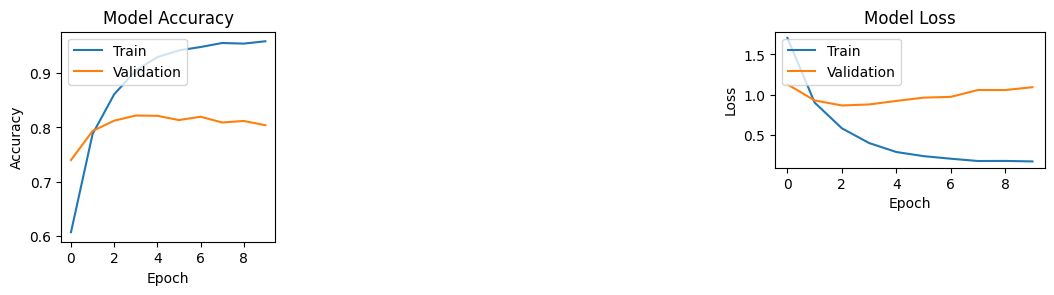

In [14]:
import matplotlib.pyplot as plt

def plot_training_history(history):
    # Plot training & validation accuracy values
    plt.figure(figsize=(16, 6))

    plt.subplot(2, 5, 2)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(3, 4, 4)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.show()

# Example: Plot training history for MNIST model
plot_training_history(history)
